In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

df = pd.read_csv('/content/defense contractors.csv')

#pd.set_option('display.max_rows', None)


df

,Symbol,Year,Name,Country,Category,Market cap,Revenue,Earnings
0,AM.PA,2003,Dassault Aviation,France,Aircraft manufacturers|Defense contractors|Man...,$4.20 B,$4.68 B,$0.55 B
1,AM.PA,2004,Dassault Aviation,France,Aircraft manufacturers|Defense contractors|Man...,$6.10 B,$4.69 B,$0.63 B
2,AM.PA,2005,Dassault Aviation,France,Aircraft manufacturers|Defense contractors|Man...,$6.94 B,$4.07 B,$0.52 B
3,AM.PA,2006,Dassault Aviation,France,Aircraft manufacturers|Defense contractors|Man...,$8.95 B,$4.42 B,$0.55 B
4,AM.PA,2007,Dassault Aviation,France,Aircraft manufacturers|Defense contractors|Man...,$9.43 B,$5.99 B,$0.82 B
...,...,...,...,...,...,...,...,...
335,SAFRF,2019,Safran,France,CAC 40|Aerospace|Defense contractors,$65.48 B,$28.11 B,$3.89 B
336,SAFRF,2020,Safran,France,CAC 40|Aerospace|Defense contractors,$60.88 B,$20.45 B,$0.70 B
337,SAFRF,2021,Safran,France,CAC 40|Aerospace|Defense contractors,$52.03 B,$17.13 B,$0.30 B
338,SAFRF,2022,Safran,France,CAC 40|Aerospace|Defense contractors,$53.21 B,$20.38 B,$1.89 B


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Symbol      340 non-null    object
 1   Year        340 non-null    int64 
 2   Name        340 non-null    object
 3   Country     340 non-null    object
 4   Category    340 non-null    object
 5   Market cap  337 non-null    object
 6   Revenue     314 non-null    object
 7   Earnings    315 non-null    object
dtypes: int64(1), object(7)
memory usage: 21.4+ KB


In [3]:
df.isnull().sum()

Symbol         0
Year           0
Name           0
Country        0
Category       0
Market cap     3
Revenue       26
Earnings      25
dtype: int64

In [4]:
df.dropna(inplace=True)

df.isnull().sum()

Symbol        0
Year          0
Name          0
Country       0
Category      0
Market cap    0
Revenue       0
Earnings      0
dtype: int64

In [5]:
df['Name'] = df['Name'].astype('string')
df['Country'] = df['Country'].astype('string')
df['Category'] = df['Category'].astype('string')
df['Symbol'] = df['Symbol'].astype('string')
df['Year'] = pd.to_datetime(df['Year'],format='%Y')
df['Year'] = df.Year.dt.year

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 311 entries, 0 to 339
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Symbol      311 non-null    string
 1   Year        311 non-null    int32 
 2   Name        311 non-null    string
 3   Country     311 non-null    string
 4   Category    311 non-null    string
 5   Market cap  311 non-null    object
 6   Revenue     311 non-null    object
 7   Earnings    311 non-null    object
dtypes: int32(1), object(3), string(4)
memory usage: 20.7+ KB


In [8]:
# df.Revenue = df.Revenue.astype("string")
# array = df.Revenue.str.split("$",n = 1, expand = True)[:] # Spliting string with $ and taking only 2nd element without $
# df.Revenue = array[1]
# array = df.Revenue.str.split(" ",n = 1, expand = True)[:] # Spliting string with {Blank Space} and taking only 2nd element without B (Billion)
# df.Revenue = array[0]
# df.Revenue = pd.to_numeric(df.Revenue, errors='coerce').astype(np.float32)
# df.Revenue

In [7]:
# Creating a function to convert the Revenue, Earnings and Market Cap columns to numbers and dealing with the '$' and 'B'
def clean_currency_column(df, column_name):
    # Convert column to string type if not already
    df[column_name] = df[column_name].astype(str)

    # Split string with '$' and take only 2nd element without '$'
    # Handle cases where '$' might not be present
    array = df[column_name].str.split("$", n=1, expand=True)
    if array.shape[1] > 1:  # Check if there's a second column after splitting
        df[column_name] = array[1]
    else:
        df[column_name] = array[0]  # Keep the original column if no '$' was found

    # Split string with blank space and take only 1st element without 'B' for billion
    array = df[column_name].str.split(" ", n=1, expand=True)
    df[column_name] = array[0]

    # Convert the string to a float
    df[column_name] = df[column_name].astype(float)

    return df[column_name]

In [8]:
clean_currency_column(df, 'Revenue')



0       4.68
1       4.69
2       4.07
3       4.42
4       5.99
       ...  
335    28.11
336    20.45
337    17.13
338    20.38
339    25.64
Name: Revenue, Length: 311, dtype: float64

In [9]:

clean_currency_column(df, 'Earnings')

df['Earnings']

0      0.55
1      0.63
2      0.52
3      0.55
4      0.82
       ... 
335    3.89
336    0.70
337    0.30
338    1.89
339    3.12
Name: Earnings, Length: 311, dtype: float64

In [10]:
clean_currency_column(df, 'Market cap')

df['Market cap']

0       4.20
1       6.10
2       6.94
3       8.95
4       9.43
       ...  
335    65.48
336    60.88
337    52.03
338    53.21
339    72.94
Name: Market cap, Length: 311, dtype: float64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 311 entries, 0 to 339
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Symbol      311 non-null    string 
 1   Year        311 non-null    int32  
 2   Name        311 non-null    string 
 3   Country     311 non-null    string 
 4   Category    311 non-null    string 
 5   Market cap  311 non-null    float64
 6   Revenue     311 non-null    float64
 7   Earnings    311 non-null    float64
dtypes: float64(3), int32(1), string(4)
memory usage: 20.7 KB


In [12]:
df

,Symbol,Year,Name,Country,Category,Market cap,Revenue,Earnings
0,AM.PA,2003,Dassault Aviation,France,Aircraft manufacturers|Defense contractors|Man...,4.20,4.68,0.55
1,AM.PA,2004,Dassault Aviation,France,Aircraft manufacturers|Defense contractors|Man...,6.10,4.69,0.63
2,AM.PA,2005,Dassault Aviation,France,Aircraft manufacturers|Defense contractors|Man...,6.94,4.07,0.52
3,AM.PA,2006,Dassault Aviation,France,Aircraft manufacturers|Defense contractors|Man...,8.95,4.42,0.55
4,AM.PA,2007,Dassault Aviation,France,Aircraft manufacturers|Defense contractors|Man...,9.43,5.99,0.82
...,...,...,...,...,...,...,...,...
335,SAFRF,2019,Safran,France,CAC 40|Aerospace|Defense contractors,65.48,28.11,3.89
336,SAFRF,2020,Safran,France,CAC 40|Aerospace|Defense contractors,60.88,20.45,0.70
337,SAFRF,2021,Safran,France,CAC 40|Aerospace|Defense contractors,52.03,17.13,0.30
338,SAFRF,2022,Safran,France,CAC 40|Aerospace|Defense contractors,53.21,20.38,1.89


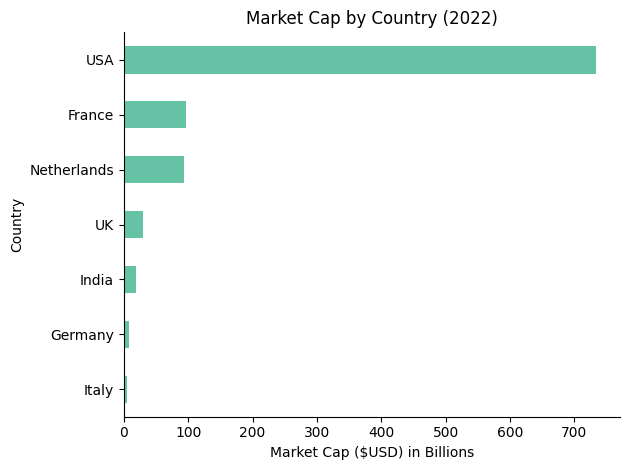

In [14]:
# Market cap for 2022 only
df_2022 = df[df['Year'] == 2022]
df_2022.groupby('Country')[['Market cap']].sum().sort_values(by='Market cap').plot(kind='barh', color=sns.color_palette('Set2'))
plt.xlabel('Market Cap ($USD) in Billions')
plt.ylabel('Country')
plt.title('Market Cap by Country (2022)')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.tight_layout()
plt.legend().remove()
plt.show()


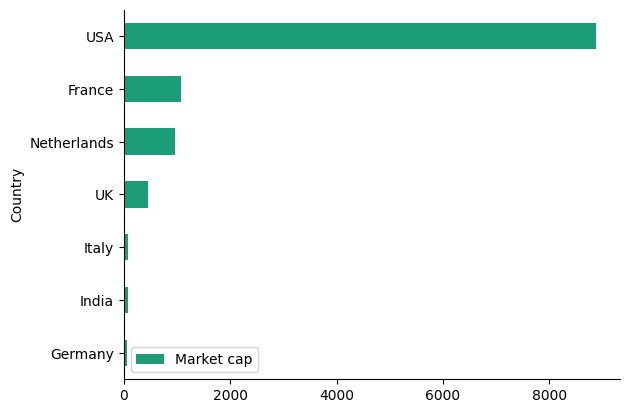

In [15]:
# @title Country

df.groupby('Country')[['Market cap']].sum().sort_values(by='Market cap').plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)


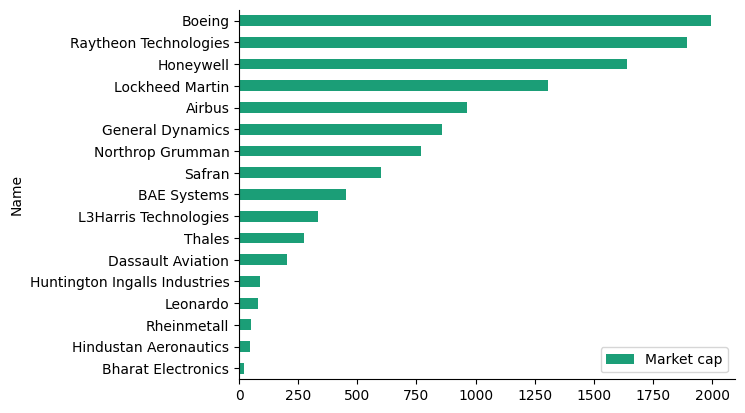

In [16]:
#Creating a horizontal barchart

df.groupby('Name')[['Market cap']].sum().sort_values(by='Market cap').plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

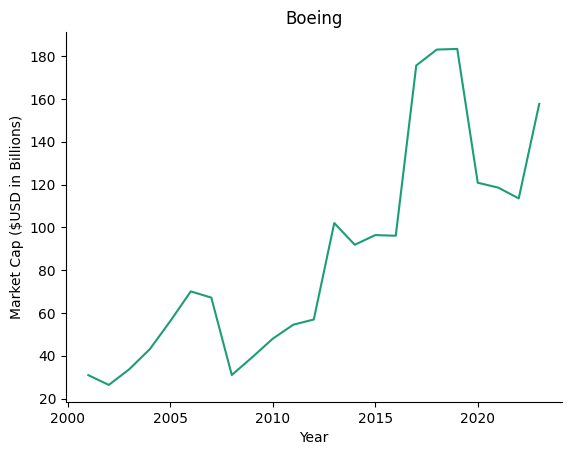

In [17]:
df_boeing = df[df['Name'] == 'Boeing']

df_boeing.groupby('Year')[['Market cap']].sum().plot(kind='line', color=sns.palettes.mpl_palette('Dark2'))
plt.title('Boeing')
plt.xlabel('Year')
plt.ylabel('Market Cap ($USD in Billions)')
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.legend().remove()

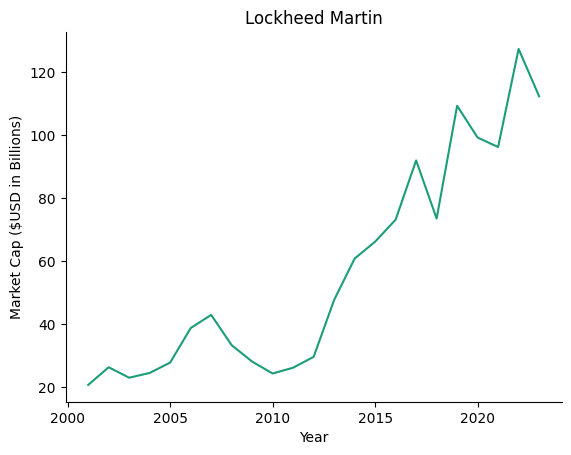

In [18]:
df_martin = df[df['Name'] == 'Lockheed Martin']

df_martin.groupby('Year')[['Market cap']].sum().plot(kind='line', color=sns.palettes.mpl_palette('Dark2'))
plt.title('Lockheed Martin')
plt.xlabel('Year')
plt.ylabel('Market Cap ($USD in Billions)')
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.legend().remove()

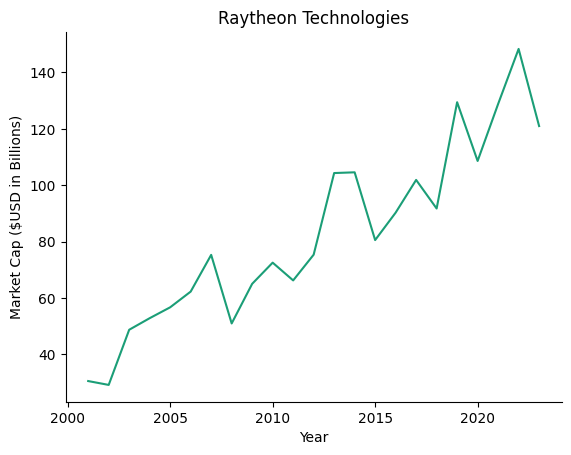

In [19]:
df_raytheon = df[df['Name'] == 'Raytheon Technologies']

df_raytheon.groupby('Year')[['Market cap']].sum().plot(kind='line', color=sns.palettes.mpl_palette('Dark2'))
plt.title('Raytheon Technologies')
plt.xlabel('Year')
plt.ylabel('Market Cap ($USD in Billions)')
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.legend().remove()

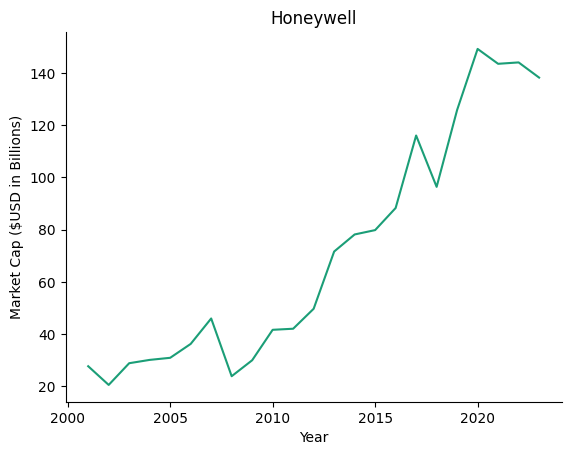

In [20]:
df_honeywell = df[df['Name'] == 'Honeywell']

df_honeywell.groupby('Year')[['Market cap']].sum().plot(kind='line', color=sns.palettes.mpl_palette('Dark2'))
plt.title('Honeywell')
plt.xlabel('Year')
plt.ylabel('Market Cap ($USD in Billions)')
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.legend().remove()

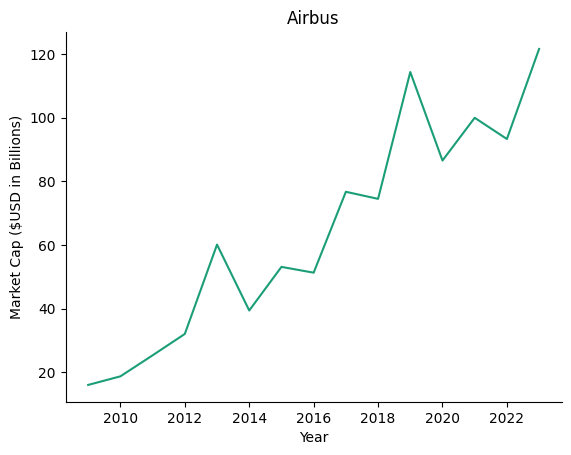

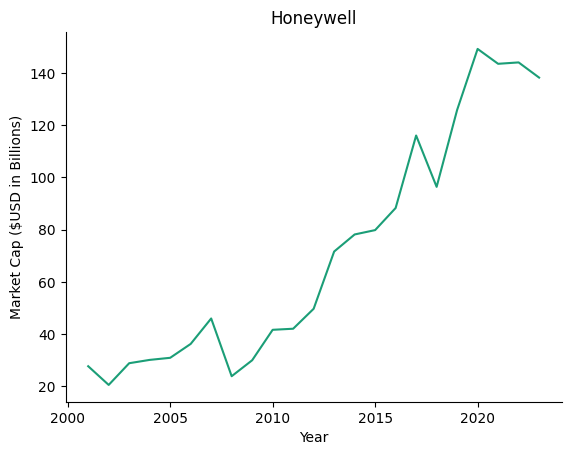

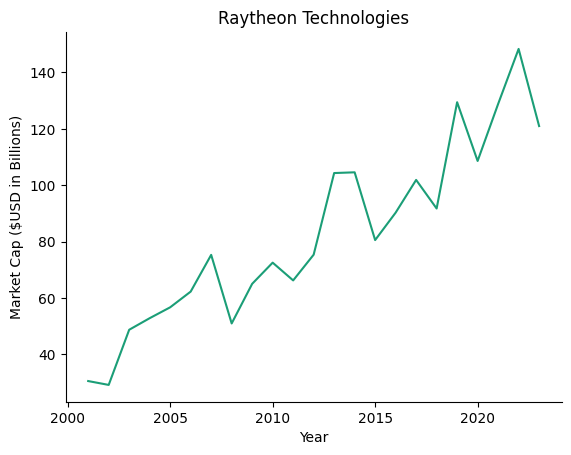

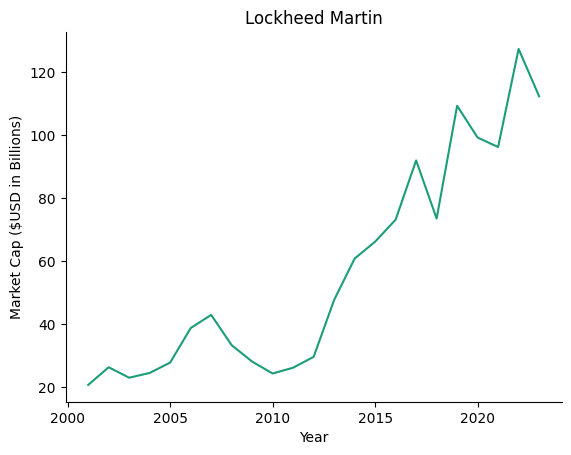

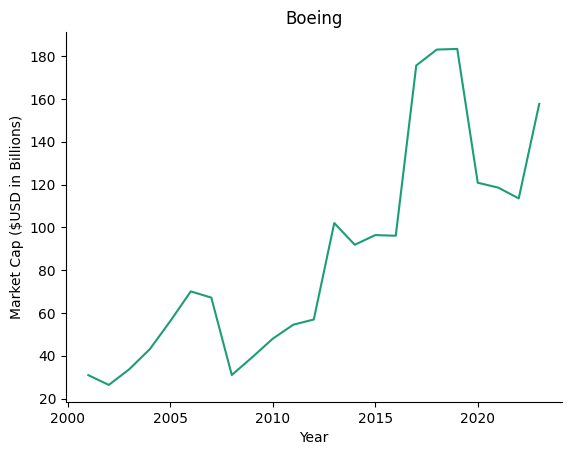

In [21]:
df_airbus = df[df['Name'] == 'Airbus']

df_airbus.groupby('Year')[['Market cap']].sum().plot(kind='line', color=sns.palettes.mpl_palette('Dark2'))
plt.title('Airbus')
plt.xlabel('Year')
plt.ylabel('Market Cap ($USD in Billions)')
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.legend().remove()

df_honeywell = df[df['Name'] == 'Honeywell']

df_honeywell.groupby('Year')[['Market cap']].sum().plot(kind='line', color=sns.palettes.mpl_palette('Dark2'))
plt.title('Honeywell')
plt.xlabel('Year')
plt.ylabel('Market Cap ($USD in Billions)')
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.legend().remove()

df_raytheon = df[df['Name'] == 'Raytheon Technologies']

df_raytheon.groupby('Year')[['Market cap']].sum().plot(kind='line', color=sns.palettes.mpl_palette('Dark2'))
plt.title('Raytheon Technologies')
plt.xlabel('Year')
plt.ylabel('Market Cap ($USD in Billions)')
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.legend().remove()

df_martin = df[df['Name'] == 'Lockheed Martin']

df_martin.groupby('Year')[['Market cap']].sum().plot(kind='line', color=sns.palettes.mpl_palette('Dark2'))
plt.title('Lockheed Martin')
plt.xlabel('Year')
plt.ylabel('Market Cap ($USD in Billions)')
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.legend().remove()

df_boeing = df[df['Name'] == 'Boeing']

df_boeing.groupby('Year')[['Market cap']].sum().plot(kind='line', color=sns.palettes.mpl_palette('Dark2'))
plt.title('Boeing')
plt.xlabel('Year')
plt.ylabel('Market Cap ($USD in Billions)')
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.legend().remove()

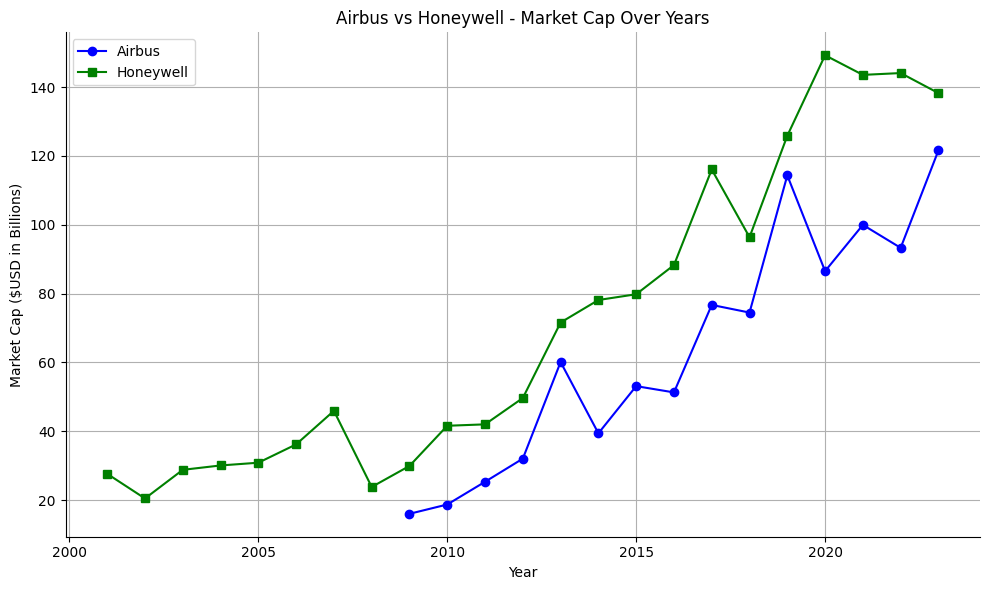

In [22]:
# Filter data for Airbus and Honeywell
df_airbus = df[df['Name'] == 'Airbus']
df_honeywell = df[df['Name'] == 'Honeywell']

# Group by Year and sum market cap
grouped_martin = df_martin.groupby('Year')['Market cap'].sum()
grouped_raytheon = df_raytheon.groupby('Year')['Market cap'].sum()
grouped_boeing = df_boeing.groupby('Year')['Market cap'].sum()
grouped_airbus = df_airbus.groupby('Year')['Market cap'].sum()
grouped_honeywell = df_honeywell.groupby('Year')['Market cap'].sum()

# Plot both lines on the same graph
plt.figure(figsize=(10, 6))  # Adjust figure size if needed

# Plot Airbus data
plt.plot(grouped_airbus.index, grouped_airbus.values, label='Airbus', marker='o', linestyle='-', color='b')

# Plot Honeywell data
plt.plot(grouped_honeywell.index, grouped_honeywell.values, label='Honeywell', marker='s', linestyle='-', color='g')

# Customize plot
plt.title('Airbus vs Honeywell - Market Cap Over Years')
plt.xlabel('Year')
plt.ylabel('Market Cap ($USD in Billions)')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.legend()

plt.grid(True)  # Add grid if needed
plt.tight_layout()  # Adjust layout
plt.show()


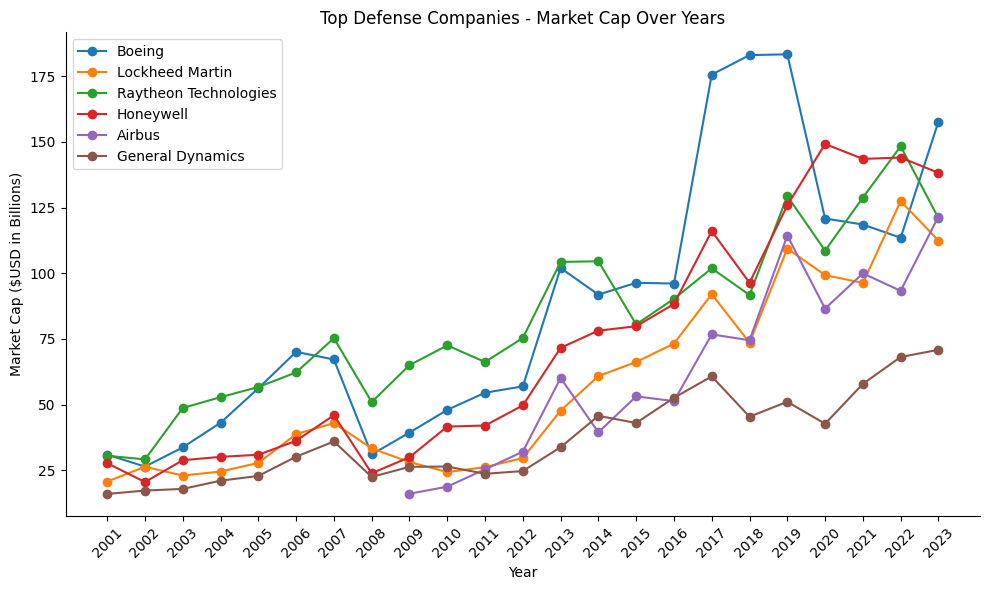

In [23]:
# Group and plot all companies' market cap on the same graph

# Create a list of the companies to include in graph
companies = ['Boeing', 'Lockheed Martin', 'Raytheon Technologies', 'Honeywell', 'Airbus', 'General Dynamics']

plt.figure(figsize=(10, 6))  # Adjust figure size if needed

# Iterate through each company
for company in companies:
    df_company = df[df['Name'] == company]
    grouped_data = df_company.groupby('Year')['Market cap'].sum()
    plt.plot(grouped_data.index, grouped_data.values, label=company, marker='o')

# Customize graph
all_years = np.arange(df['Year'].min(), df['Year'].max() + 1)  # To display each year 2000-2022

plt.xticks(ticks=all_years, labels=all_years, rotation=45) # Display each year along x-axis

plt.title('Top Defense Companies - Market Cap Over Years')
plt.xlabel('Year')
plt.ylabel('Market Cap ($USD in Billions)')
plt.gca().spines[['top', 'right',]].set_visible(False)  # Remove top and right spines
plt.legend()

#plt.grid(True)  # Add grid if needed
plt.tight_layout()  # Adjust layout
plt.show()


In [24]:
# revenue_trends = df.pivot_table(values='Revenue', index='Year', columns='Name', aggfunc='sum')[companies]

# #revenue_trends = revenue_trends.drop([2021, 2022], axis=0)

# revenue_trends

# revenue_trends.plot(kind='line', figsize=(10, 6))
# plt.title('Revenue Trends by Company')
# plt.xlabel('Year')
# plt.ylabel('Revenue ($USD in Billions)')

# plt.xticks(ticks=revenue_trends.index, labels=revenue_trends.index.astype(int), rotation=45) # Convert index to integers
# plt.gca().spines[['top', 'right']].set_visible(False)
# plt.title('Top Defense Companies - Revenue Over Years')
# plt.xlabel('Year')
# plt.ylabel('Revenue ($USD in Billions)')
# plt.gca().spines[['top', 'right']].set_visible(False)
# plt.legend()

# #plt.grid(True)  # Add grid if needed
# plt.tight_layout()  # Adjust layout
# plt.show()



In [25]:
# Filter the DataFrame to include only the years up to 2020
#df_filtered = df[df['Year'] <= 2020]

# Create the pivot table with the filtered DataFrame
revenue_trends = df.pivot_table(values='Revenue', index='Year', columns='Name', aggfunc='sum')[companies]

revenue_trends

Name,Boeing,Lockheed Martin,Raytheon Technologies,Honeywell,Airbus,General Dynamics
Year,,,,,,
2001,58.189999,23.990000,27.480000,23.650000,NaN,12.160000
2002,54.060001,26.570000,27.980000,22.270000,NaN,13.820000
2003,50.480000,31.820000,30.719999,23.100000,NaN,16.610001
2004,52.509998,35.520000,36.700001,25.600000,NaN,19.180000
2005,54.840000,37.209999,42.270000,27.650000,NaN,21.240000
2006,61.529999,39.619999,47.110001,31.360001,NaN,24.080000
2007,66.379997,41.860001,54.750000,34.580002,NaN,27.240000
2008,60.900002,42.730000,58.040001,36.549999,NaN,29.299999
2009,68.279999,45.180000,52.419998,30.900000,60.410000,31.980000


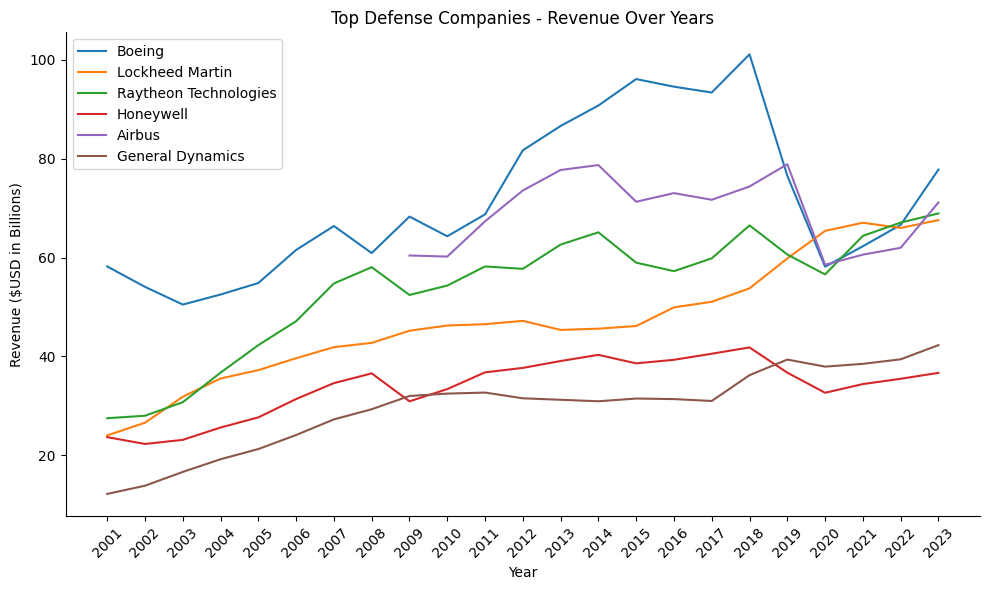

In [26]:
revenue_trends.plot(kind='line', figsize=(10, 6))
plt.title('Revenue Trends by Company')
plt.xlabel('Year')
plt.ylabel('Revenue ($USD in Billions)')

plt.xticks(ticks=revenue_trends.index, labels=revenue_trends.index.astype(int), rotation=45) # Convert index to integers
plt.gca().spines[['top', 'right']].set_visible(False)
plt.title('Top Defense Companies - Revenue Over Years')
plt.xlabel('Year')
plt.ylabel('Revenue ($USD in Billions)')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.legend()

#plt.grid(True)  # Add grid if needed
plt.tight_layout()  # Adjust layout
plt.show()

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 311 entries, 0 to 339
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Symbol      311 non-null    string 
 1   Year        311 non-null    int32  
 2   Name        311 non-null    string 
 3   Country     311 non-null    string 
 4   Category    311 non-null    string 
 5   Market cap  311 non-null    float32
 6   Revenue     311 non-null    float32
 7   Earnings    311 non-null    float32
dtypes: float32(3), int32(1), string(4)
memory usage: 17.0 KB


In [28]:
#Bring in other data set of the three companies

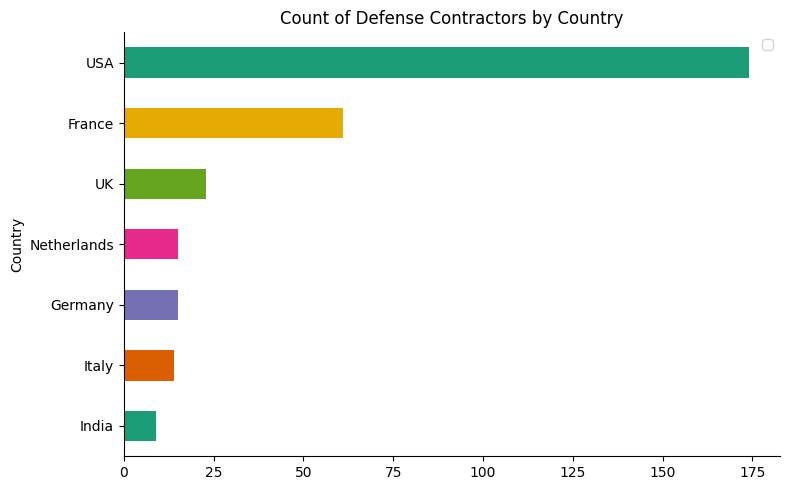

In [29]:
df_country = df.groupby('Country').size().sort_values()

df_country.plot(kind='barh', figsize=(8, 5), color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right']].set_visible(False)

plt.title('Count of Defense Contractors by Country')
plt.xlabel('')
plt.ylabel('Country')

plt.legend()

#plt.grid(True)  # Add grid if needed
plt.tight_layout()  # Adjust layout
plt.show()



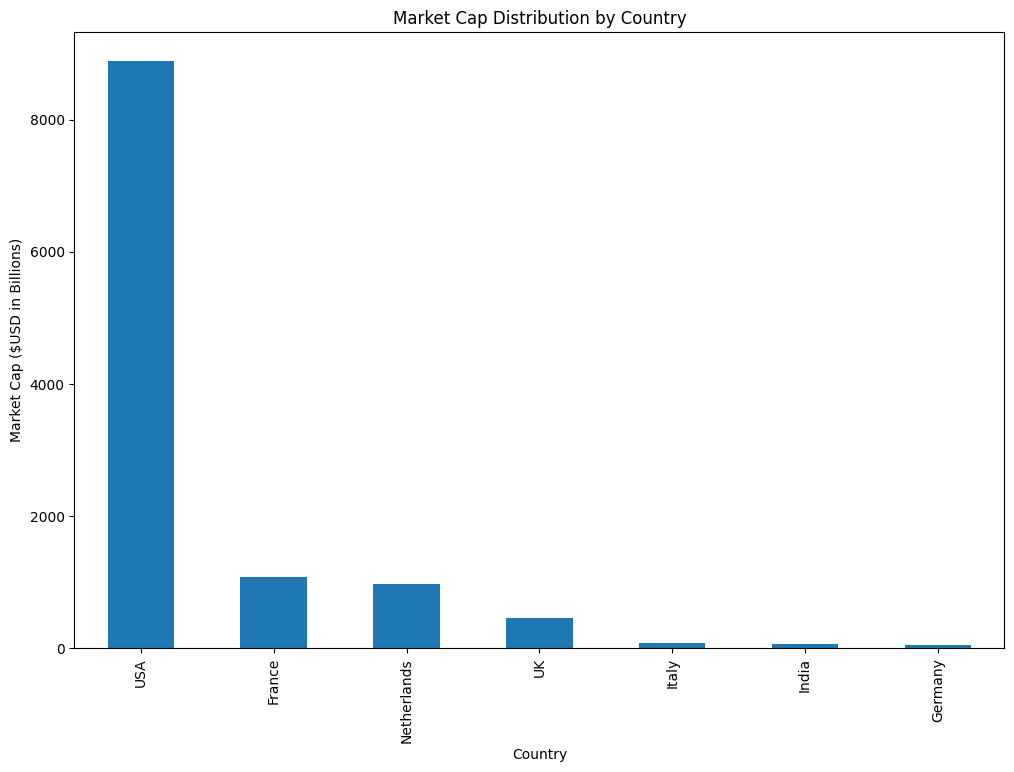

In [30]:
# Aggregate market cap by country
country_market_cap = df.groupby('Country')['Market cap'].sum().sort_values(ascending=False)

# Plot market cap by country
country_market_cap.plot(kind='bar', figsize=(12, 8))
plt.title('Market Cap Distribution by Country')
plt.xlabel('Country')
plt.ylabel('Market Cap ($USD in Billions)')
plt.show()

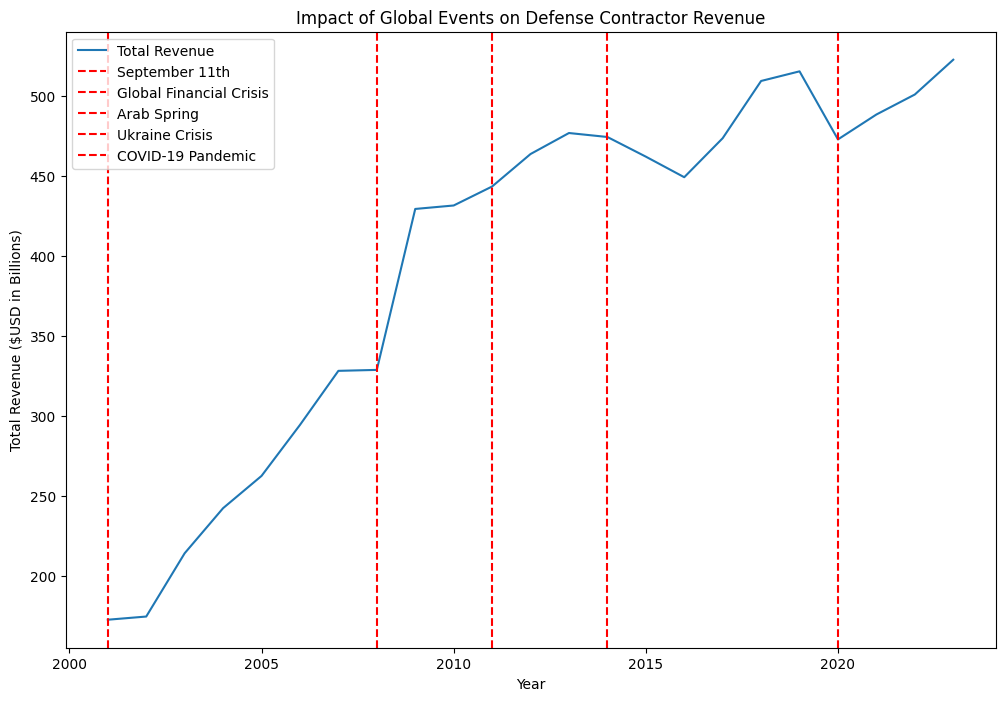

In [31]:
# Define key events
key_events = {
    '2001': 'September 11th',
    '2008': 'Global Financial Crisis',
    '2011': 'Arab Spring',
    '2014': 'Ukraine Crisis',
    '2020': 'COVID-19 Pandemic'
}

# Aggregate revenue by year
yearly_revenue = df.groupby('Year')['Revenue'].sum()

# Plot revenue with key events
plt.figure(figsize=(12, 8))
plt.plot(yearly_revenue.index, yearly_revenue.values, label='Total Revenue')
for year, event in key_events.items():
    plt.axvline(x=int(year), color='r', linestyle='--', label=event)
plt.title('Impact of Global Events on Defense Contractor Revenue')
plt.xlabel('Year')
plt.ylabel('Total Revenue ($USD in Billions)')
plt.legend()
plt.show()


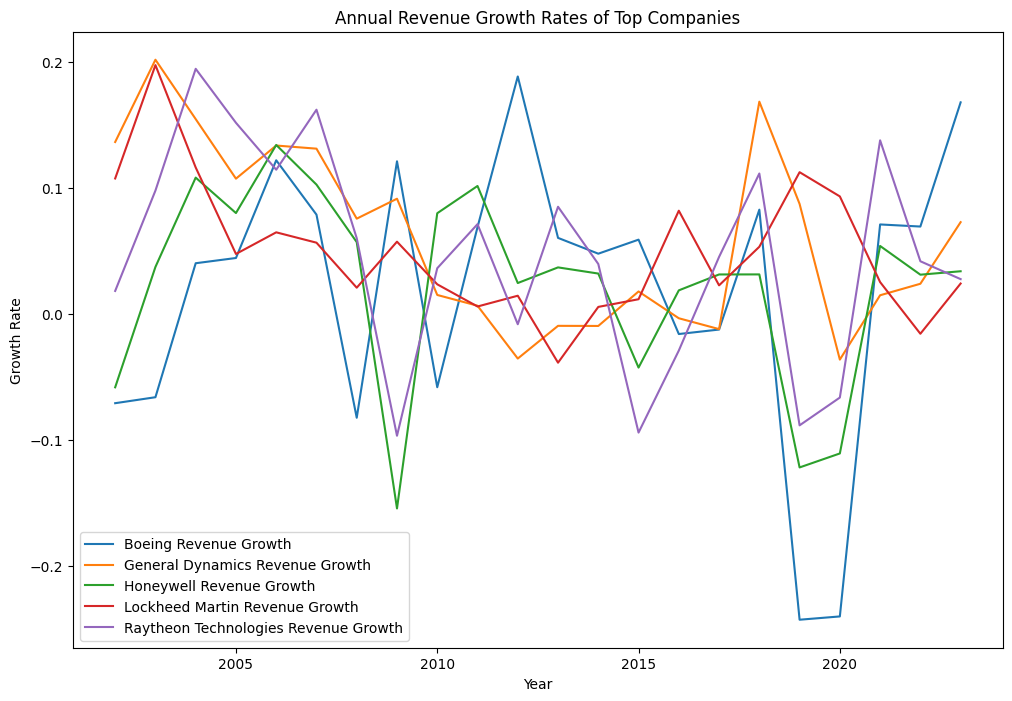

In [32]:
# Calculate annual growth rates for each company
df['Revenue Growth'] = df.groupby('Name')['Revenue'].pct_change()
df['Market Cap Growth'] = df.groupby('Name')['Market cap'].pct_change()
df['Earnings Growth'] = df.groupby('Name')['Earnings'].pct_change()

# Filter top companies
top_companies = ['Boeing', 'General Dynamics', 'Honeywell', 'Lockheed Martin', 'Raytheon Technologies']
growth_data = df[df['Name'].isin(top_companies)]

# Plot growth rates
plt.figure(figsize=(12, 8))
for company in top_companies:
    company_data = growth_data[growth_data['Name'] == company]
    plt.plot(company_data['Year'], company_data['Revenue Growth'], label=f'{company} Revenue Growth')
plt.title('Annual Revenue Growth Rates of Top Companies')
plt.xlabel('Year')
plt.ylabel('Growth Rate')
plt.legend()
plt.show()


In [33]:
!pip install geopandas

<ipython-input-34-c4fbf7f145b6>:11: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


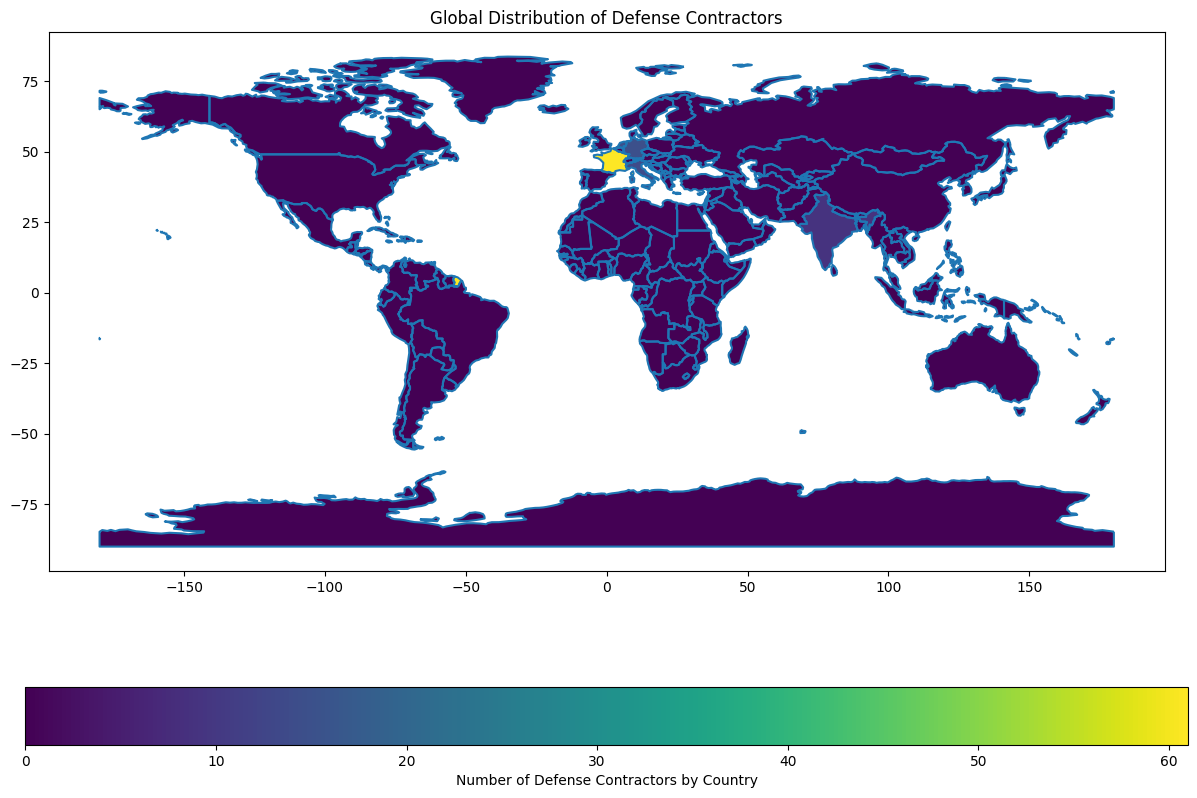

In [34]:
import geopandas as gpd

# Load the cleaned data


# Aggregate the number of defense contractors by country
country_counts = df_country = df.groupby('Country').size().sort_values().reset_index()
country_counts.columns = ['Country', 'Number of Contractors']

# Load the world map
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Merge the world map with the country counts
world = world.merge(country_counts, how='left', left_on='name', right_on='Country')
world['Number of Contractors'] = world['Number of Contractors'].fillna(0)

# Plot the map
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
world.boundary.plot(ax=ax)
world.plot(column='Number of Contractors', ax=ax, legend=True,
           legend_kwds={'label': "Number of Defense Contractors by Country",
                        'orientation': "horizontal"})
plt.title('Global Distribution of Defense Contractors')
plt.show()

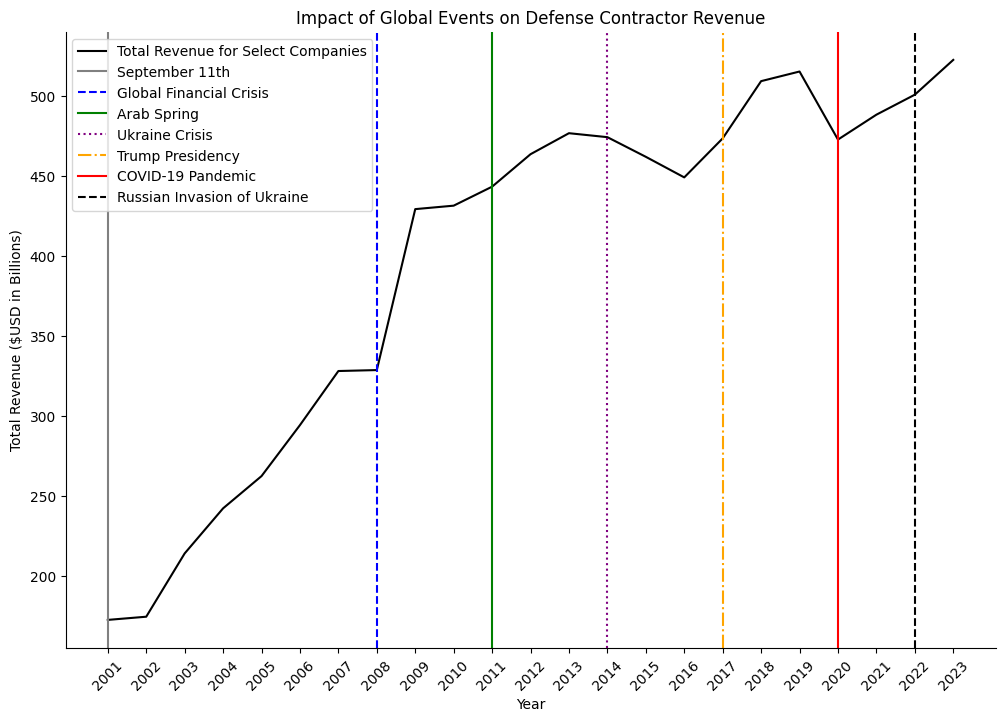

In [35]:


# Define key events with different styles
key_events = {
    '2001': {'name': 'September 11th', 'color': 'grey', 'linestyle': '-'},
    '2008': {'name': 'Global Financial Crisis', 'color': 'blue', 'linestyle': '--'},
    '2011': {'name': 'Arab Spring', 'color': 'green', 'linestyle': '-'},
    '2014': {'name': 'Ukraine Crisis', 'color': 'purple', 'linestyle': ':'},
    '2017': {'name': 'Trump Presidency', 'color': 'orange', 'linestyle': '-.'},
    '2020': {'name': 'COVID-19 Pandemic', 'color': 'red', 'linestyle': '-'},
    '2022': {'name': 'Russian Invasion of Ukraine', 'color': 'black', 'linestyle': '--'}
}

# Aggregate revenue by year (this is already aggregated in this example)
yearly_revenue = df.groupby('Year')['Revenue'].sum()

# Plot revenue with key events
plt.figure(figsize=(12, 8))
plt.plot(yearly_revenue.index, yearly_revenue.values, label='Total Revenue for Select Companies', color='black')

# Add vertical lines for key events with different styles
for year, event in key_events.items():
    plt.axvline(x=int(year), color=event['color'], linestyle=event['linestyle'], label=event['name'])

# Customize plot
plt.title('Impact of Global Events on Defense Contractor Revenue')
plt.xlabel('Year')
plt.ylabel('Total Revenue ($USD in Billions)')
plt.xticks(ticks=np.arange(df['Year'].min(), df['Year'].max() + 1), rotation=45)
plt.gca().spines[['top', 'right']].set_visible(False)
plt.legend()
plt.show()


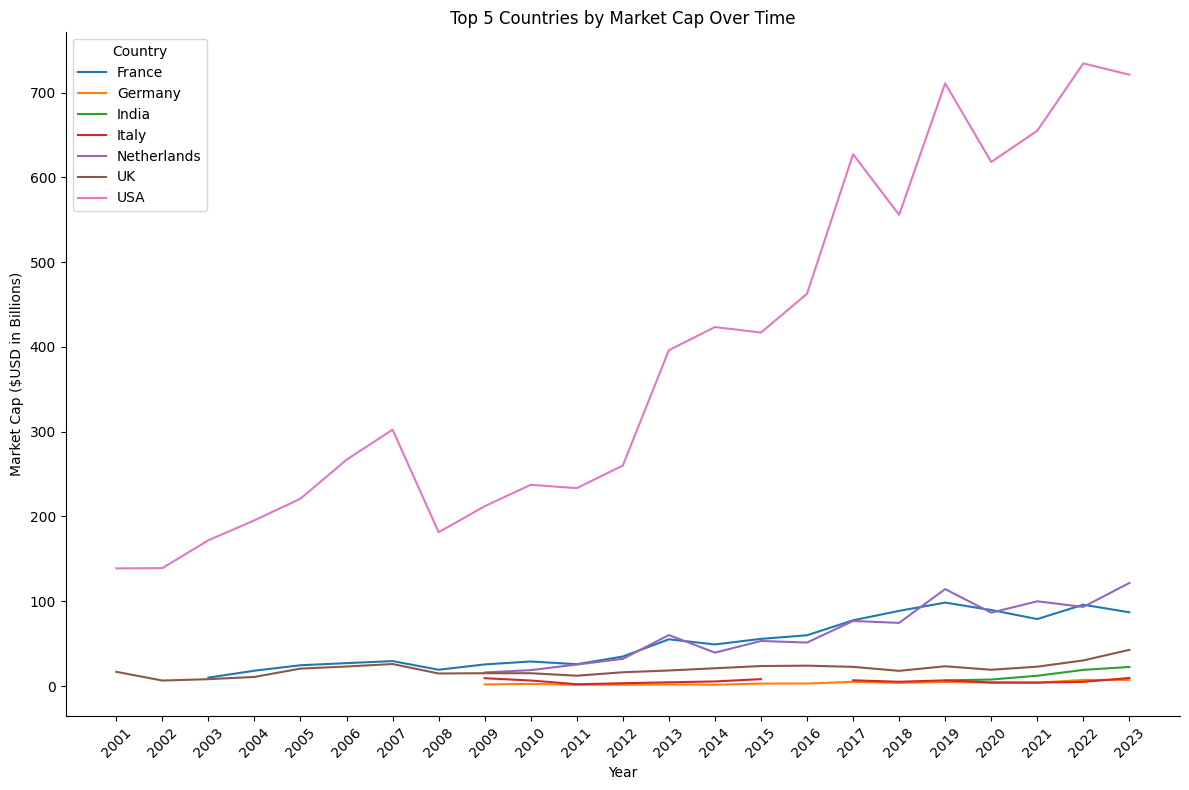

In [36]:
# Aggregate market cap by country and year
country_year_market_cap = df.groupby(['Country', 'Year'])['Market cap'].sum().reset_index()

# Identify the top 5 countries by total market cap
top_countries = country_year_market_cap.groupby('Country')['Market cap'].sum().index

# Filter the data to include only the top 5 countries
filtered_data = country_year_market_cap[country_year_market_cap['Country'].isin(top_countries)]

# Pivot the data to create a table with years as index and countries as columns
pivot_table = filtered_data.pivot(index='Year', columns='Country', values='Market cap')

# Plot the line graph
plt.figure(figsize=(12, 8))
for country in top_countries:
    plt.plot(pivot_table.index, pivot_table[country], label=country)

# Customize plot
plt.title('Top 5 Countries by Market Cap Over Time')
plt.xlabel('Year')
plt.ylabel('Market Cap ($USD in Billions)')
plt.legend(title='Country')
plt.xticks(ticks=pivot_table.index, rotation=45)
# plt.grid(True)
plt.gca().spines[['top', 'right']].set_visible(False)
plt.tight_layout()
plt.show()


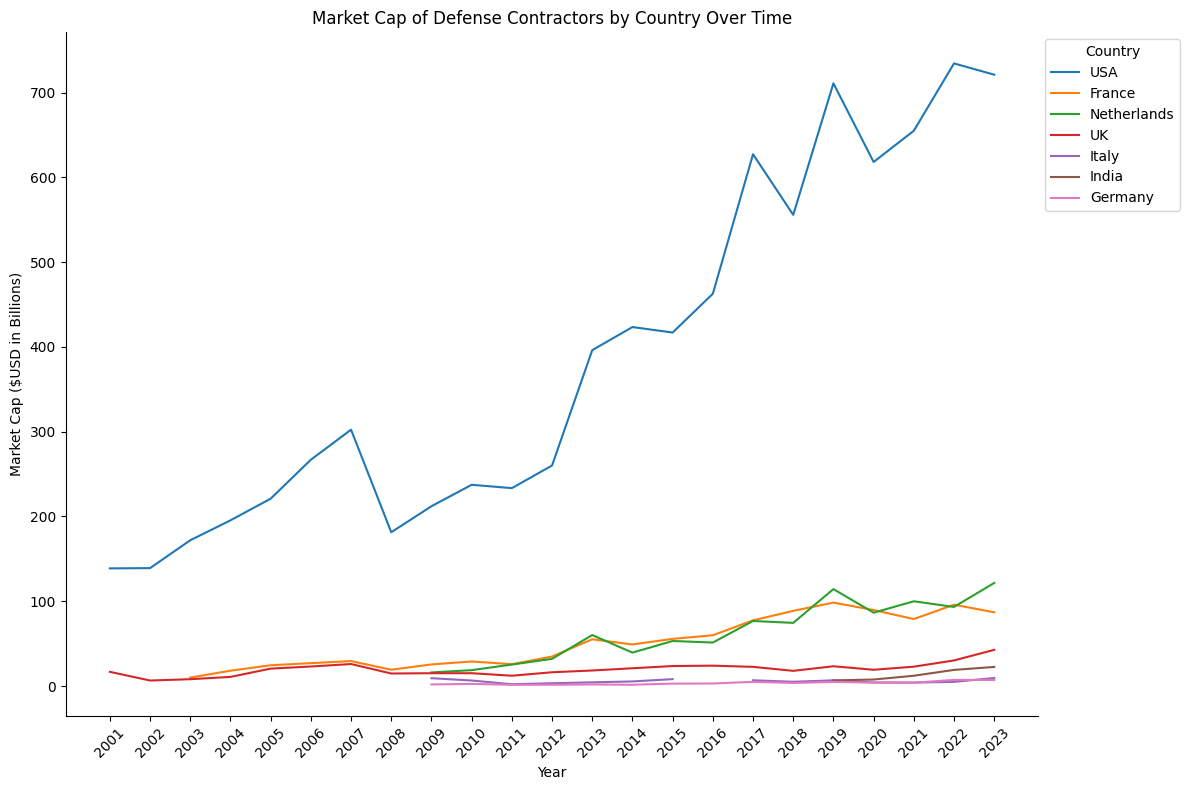

In [37]:


# Aggregate market cap by country and year
country_year_market_cap = df.groupby(['Country', 'Year'])['Market cap'].sum().reset_index()

# Calculate total market cap for each country
total_market_cap_by_country = country_year_market_cap.groupby('Country')['Market cap'].sum()

# Sort countries by total market cap in descending order
sorted_countries = total_market_cap_by_country.sort_values(ascending=False).index

# Pivot the data to create a table with years as index and countries as columns
pivot_table = country_year_market_cap.pivot(index='Year', columns='Country', values='Market cap')

# Plot the line graph
plt.figure(figsize=(12, 8))
for country in sorted_countries:
    plt.plot(pivot_table.index, pivot_table[country], label=country)

# Customize plot
plt.title('Market Cap of Defense Contractors by Country Over Time')
plt.xlabel('Year')
plt.ylabel('Market Cap ($USD in Billions)')
plt.legend(title='Country', loc='upper left', bbox_to_anchor=(1, 1))
plt.xticks(ticks=pivot_table.index, rotation=45)
#plt.grid(True)
plt.gca().spines[['top', 'right']].set_visible(False)

plt.tight_layout()
plt.show()


In [38]:
df_france = df[df['Country']=='France']

df_france

,Symbol,Year,Name,Country,Category,Market cap,Revenue,Earnings,Revenue Growth,Market Cap Growth,Earnings Growth
0,AM.PA,2003,Dassault Aviation,France,Aircraft manufacturers|Defense contractors|Man...,4.200000,4.680000,0.55,NaN,NaN,NaN
1,AM.PA,2004,Dassault Aviation,France,Aircraft manufacturers|Defense contractors|Man...,6.100000,4.690000,0.63,0.002137,0.452381,0.145455
2,AM.PA,2005,Dassault Aviation,France,Aircraft manufacturers|Defense contractors|Man...,6.940000,4.070000,0.52,-0.132196,0.137705,-0.174603
3,AM.PA,2006,Dassault Aviation,France,Aircraft manufacturers|Defense contractors|Man...,8.950000,4.420000,0.55,0.085995,0.289625,0.057692
4,AM.PA,2007,Dassault Aviation,France,Aircraft manufacturers|Defense contractors|Man...,9.430000,5.990000,0.82,0.355204,0.053631,0.490909
...,...,...,...,...,...,...,...,...,...,...,...
335,SAFRF,2019,Safran,France,CAC 40|Aerospace|Defense contractors,65.480003,28.110001,3.89,0.168815,0.250334,1.015544
336,SAFRF,2020,Safran,France,CAC 40|Aerospace|Defense contractors,60.880001,20.450001,0.70,-0.272501,-0.070251,-0.820051
337,SAFRF,2021,Safran,France,CAC 40|Aerospace|Defense contractors,52.029999,17.129999,0.30,-0.162347,-0.145368,-0.571429
338,SAFRF,2022,Safran,France,CAC 40|Aerospace|Defense contractors,53.209999,20.379999,1.89,0.189726,0.022679,5.300000


In [39]:
df_netherlands = df[df['Country']=='Netherlands']

df_netherlands

,Symbol,Year,Name,Country,Category,Market cap,Revenue,Earnings,Revenue Growth,Market Cap Growth,Earnings Growth
86,EADSF,2009,Airbus,Netherlands,Aircraft manufacturers|Aerospace|CAC 40|Manufa...,16.049999,60.410000,-0.73,NaN,NaN,NaN
87,EADSF,2010,Airbus,Netherlands,Aircraft manufacturers|Aerospace|CAC 40|Manufa...,18.750000,60.189999,1.62,-0.003642,0.168224,-3.219178
88,EADSF,2011,Airbus,Netherlands,Aircraft manufacturers|Aerospace|CAC 40|Manufa...,25.350000,67.320000,2.00,0.118458,0.352000,0.234568
89,EADSF,2012,Airbus,Netherlands,Aircraft manufacturers|Aerospace|CAC 40|Manufa...,32.070000,73.559998,3.14,0.092692,0.265089,0.570000
90,EADSF,2013,Airbus,Netherlands,Aircraft manufacturers|Aerospace|CAC 40|Manufa...,60.130001,77.709999,3.27,0.056417,0.874961,0.041401
91,EADSF,2014,Airbus,Netherlands,Aircraft manufacturers|Aerospace|CAC 40|Manufa...,39.430000,78.709999,4.77,0.012868,-0.344254,0.458716
92,EADSF,2015,Airbus,Netherlands,Aircraft manufacturers|Aerospace|CAC 40|Manufa...,53.130001,71.279999,4.46,-0.094397,0.347451,-0.064990
93,EADSF,2016,Airbus,Netherlands,Aircraft manufacturers|Aerospace|CAC 40|Manufa...,51.310001,73.029999,2.06,0.024551,-0.034256,-0.538117
94,EADSF,2017,Airbus,Netherlands,Aircraft manufacturers|Aerospace|CAC 40|Manufa...,76.720001,71.680000,5.21,-0.018486,0.495225,1.529126
95,EADSF,2018,Airbus,Netherlands,Aircraft manufacturers|Aerospace|CAC 40|Manufa...,74.500000,74.370003,5.47,0.037528,-0.028936,0.049904
